# Analysis of classification model

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#tf.enable_eager_execution()

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics

tf.random.set_seed(13)

import py3nvml
py3nvml.grab_gpus(1)

1

In [2]:
y_pred = np.argmax(np.load("../models/trained_models_acc/classification/val_preds.npy"), axis = -1)
y_true = np.load("../data/histStat_norm_class/y_val_labels.npy")
y_pred.shape, y_true.shape

((249760,), (249760,))

In [3]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77     75880
           1       0.83      0.84      0.84    137235
           2       0.80      0.72      0.76     29995
           3       0.71      0.67      0.69      5740
           4       0.56      0.55      0.56       840
           5       1.00      0.10      0.18        70

    accuracy                           0.80    249760
   macro avg       0.78      0.61      0.63    249760
weighted avg       0.80      0.80      0.80    249760



In [4]:
def print_confusion_matrix(confusion_matrix, class_names = None, figsize = (10,7), fontsize=14, labels=None, title=None):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    sns.set(font_scale=1)
    if class_names == None:
        class_names = list(np.arange(len(confusion_matrix)))
        
    print(class_names)
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')
    
    if labels:
        heatmap.yaxis.set_ticklabels(labels, rotation=0, ha='right', fontsize=fontsize)
        heatmap.xaxis.set_ticklabels(labels, rotation=45, ha='right', fontsize=fontsize)
    else:
        heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
        heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True MMI')
    plt.xlabel('Predicted MMI')
    if title != None:
        plt.title(title)
    return fig

[0, 1, 2, 3, 4, 5]


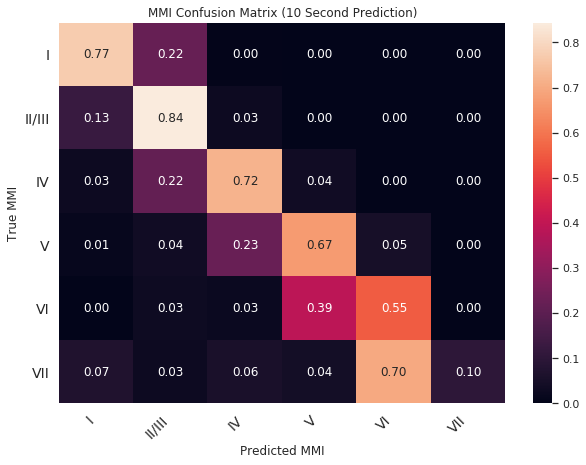

In [5]:
cmat = metrics.confusion_matrix(y_true, y_pred)
cmat = cmat / np.expand_dims(np.sum(cmat, axis = 1), 1)
print_confusion_matrix(cmat, labels=["I", "II/III", "IV", "V", "VI", "VII", "VIII", "IX", "X+"], title="MMI Confusion Matrix (10 Second Prediction)");

In [6]:
def recover_quake(y, num_quakes = 7136, stations = 15):
    return y.reshape(num_quakes, -1, stations)

In [7]:
y_pred = recover_quake(y_pred, stations = 1).squeeze()
y_true = recover_quake(y_true, stations = 1).squeeze()
print(y_pred.shape, y_true.shape)

(7136, 35) (7136, 35)


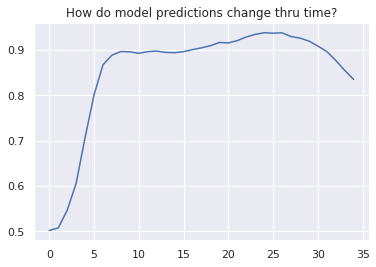

In [8]:
plt.figure()
plt.title("How do model predictions change thru time?")
plt.plot(np.mean(y_pred, axis = 0))

In [9]:
pred_time = np.argmin(y_pred == y_true, axis = -1)

<BarContainer object of 35 artists>

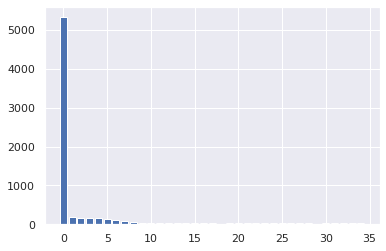

In [10]:
uniq, freq = np.unique(pred_time, return_counts = True)
plt.bar(uniq, freq)

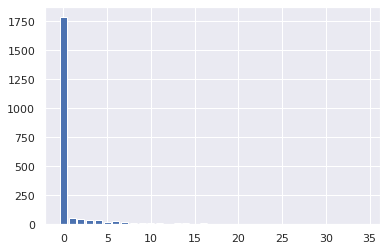

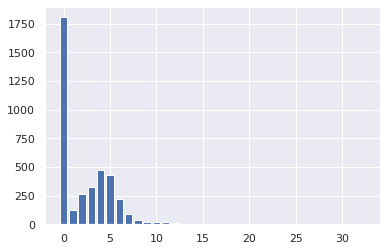

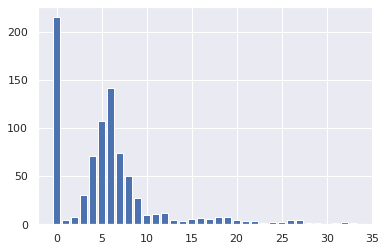

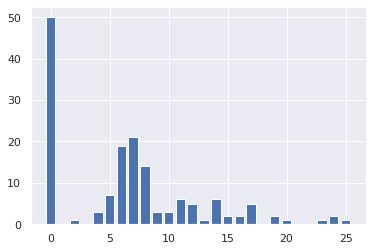

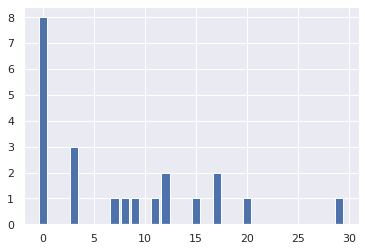

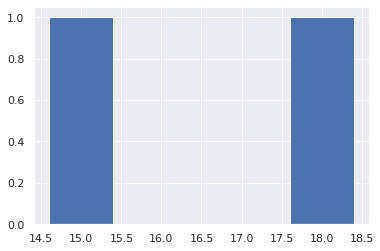

In [39]:
for class_num in range(6):
    relevant_quakes = y_pred[y_true[:, 0] == class_num]
    correct = relevant_quakes[np.max(relevant_quakes==class_num, axis = -1)]
    pred_time = np.argmax(correct ==class_num, axis = -1)
    uniq, freq = np.unique(pred_time, return_counts = True)
    
    plt.figure()
    plt.bar(uniq, freq)
    plt.show()

In [38]:
correct.shape, relevant_quakes.shape

((3892, 35), (3921, 35))

In [28]:
np.sum(relevant_quakes)

2

In [30]:
np.min(relevant_quakes)

False